# [Machine Learning Project] 고객 신용 위험 예측

---

## 프로젝트 목표
- 고객행동에 기반한 데이터 분석을 통하여 신용 위험을 예측하는 분류 모델 수행
- 불균형 데이터에 대한 다양한 Oversampling 방법과 모델을 적용하여 최적의 조합 도출
- 고객 신용 위험에 영향을 미치는 특성 데이터들에 대한 데이터 분석 수행

---

## (1) Data, EDA 목차
1. **데이터 읽기:** 고객 데이터를 불러오고 Dataframe 구조를 확인
    

2. **데이터 정제:** 비어 있는 데이터 또는 쓸모 없는 데이터를 삭제


3. **데이터 시각화:** 변수 시각화를 통하여 분포 파악<br>
    3.1. Risk_Flag 시각화<br>
    3.2. Age 시각화<br>
    3.3. Income 시각화<br>
    3.4. Experience 시각화<br>
    3.5. CURRENT_JOB_YRS 시각화<br>
    3.6. CURRENT_HOUSE_YRS 시각화<br>
    3.7. Married/Single 시각화<br>
    3.8. House_Ownership 시각화<br>
    3.9. Car_Ownership 시각화<br>
    3.10. Profession 시각화<br>
    3.11. CITY 시각화<br>
    3.12. STATE 시각화<br>


---

## 데이터 출처
-  https://www.kaggle.com/subhamjain/loan-prediction-based-on-customer-behavior?select=Training+Data.csv

---

## 1. 데이터 읽기

### 변수 설명) Variable : Description
- income : Income of the user
- age : Age of the user
- experience : Professional experience of the user in years
- profession : Profession
- married : Whether married or single 
- house_ownership : Owned or rented or neither
- car_ownership : Does the person own a car
- currentjobyears : Years of experience in the current job
- currenthouseyears	: Number of years in the current residence
- city : City of residence
- state	: State of residence
- risk_flag : Defaulted on a loan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# 데이터를 pandas를 사용하여 dataframe 형태로 저장
df = pd.read_csv("Loan_data.csv")

In [3]:
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [4]:
# dataframe의 정보를 요약해서 출력
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [5]:
# 수치형 변수의 데이터 정보를 요약하여 출력
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


## 2. 데이터 정제

In [6]:
# 각 변수별로 결측값이 몇개가 있는지 확인
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

<AxesSubplot:>

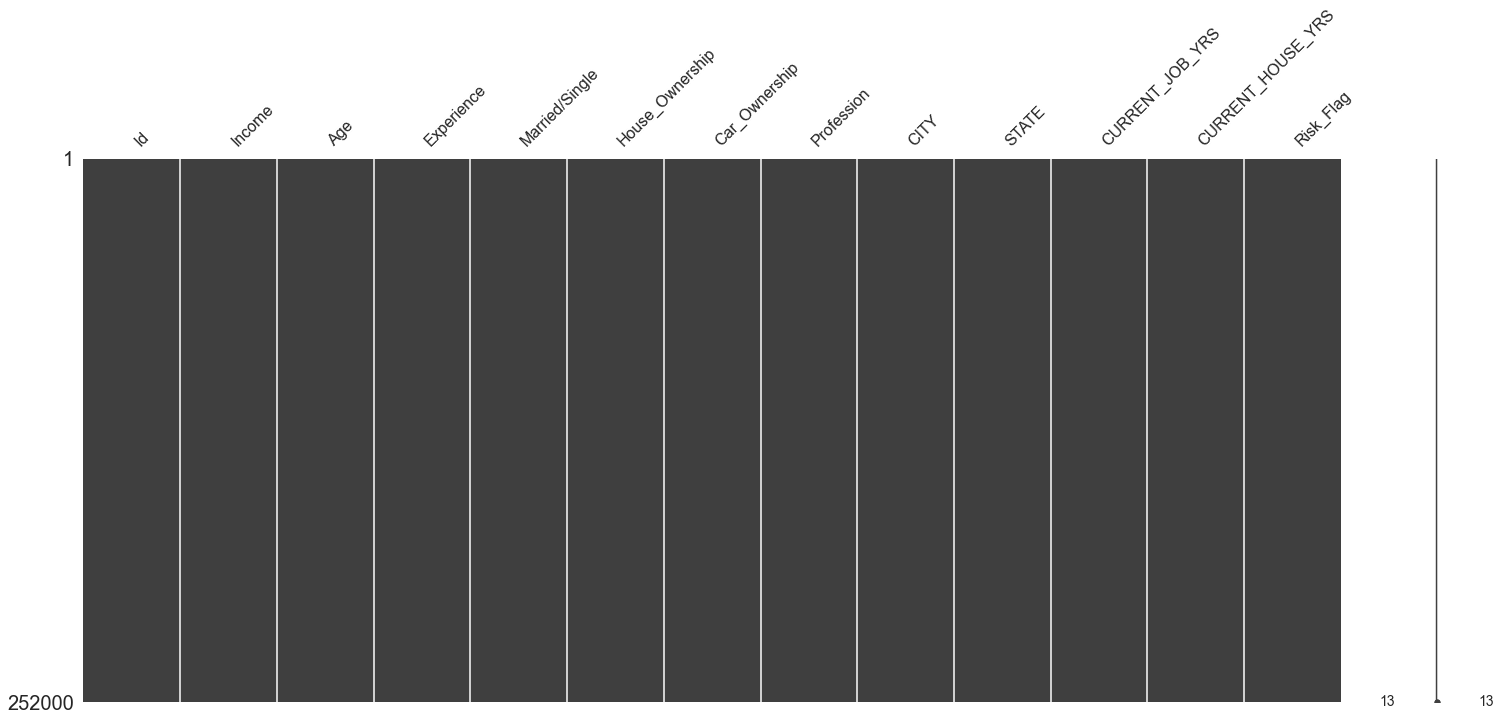

In [10]:
# 결측치 분포 시각화
import missingno as msno
msno.matrix(df)

## 3. 데이터 시각화

### 3.1 `Risk_Flag` 시각화

<AxesSubplot:xlabel='Risk_Flag', ylabel='count'>

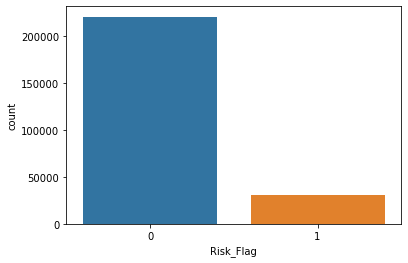

In [7]:
sns.countplot(x=df['Risk_Flag'])

- Default 경험이 없는(Risk_Flag = 0) 고객의 비율이 훨씬 많은 불균형 데이터셋이므로 OverSampling 혹은 UnderSampling이 필요하다.

## (2) `Age` 시각화

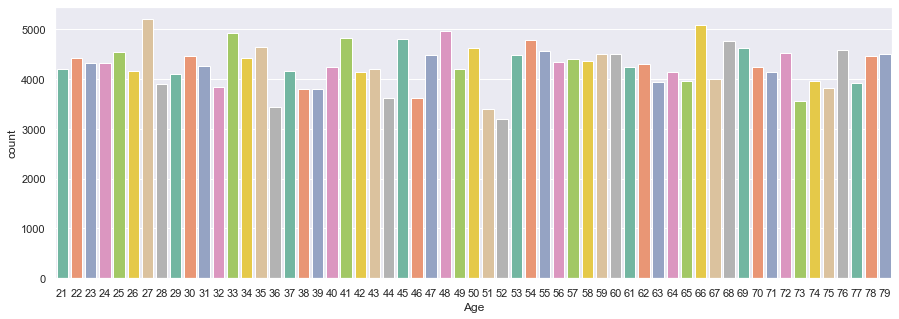

In [8]:
plt.figure(figsize=(15,5))
sns.set(style='darkgrid')
ax = sns.countplot(x='Age', data=df, palette="Set2") # 연령대가 고루 분포

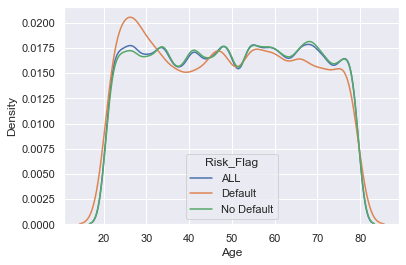

In [9]:
# Risk 상관없이 모든 사람들의 age 분포
sns.distplot(df['Age'], hist=False, label='ALL')

# Default인 사람들의 age의 분포 그리기
sns.distplot(df[df['Risk_Flag']==1]['Age'], hist=False, label='Default')

# No Default인 사람들의 age의 분포 그리기
sns.distplot(df[df['Risk_Flag']==0]['Age'], hist=False, label='No Default')

plt.legend(title='Risk_Flag')
plt.show()

## (3) `Income` 시각화

{'whiskers': [<matplotlib.lines.Line2D at 0x1f5ed580e48>,
 'caps': [<matplotlib.lines.Line2D at 0x1f5ed597f48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f5ed591c08>],
 'medians': [<matplotlib.lines.Line2D at 0x1f5ed59bcc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f5ed5a42c8>],
 'means': []}

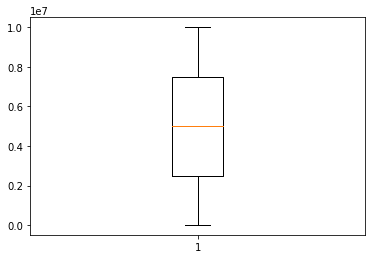

In [14]:
plt.boxplot(df['Income']) # 이상치 없음

<AxesSubplot:xlabel='Risk_Flag', ylabel='Income'>

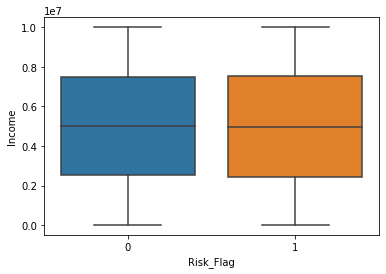

In [15]:
sns.boxplot(x='Risk_Flag', y='Income', data=df)

## (4) `Experience` 시각화

{'whiskers': [<matplotlib.lines.Line2D at 0x1f5ed796f88>,
 'caps': [<matplotlib.lines.Line2D at 0x1f5ed79bb48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f5ed7969c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1f5ed79bb08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f5ee781f08>],
 'means': []}

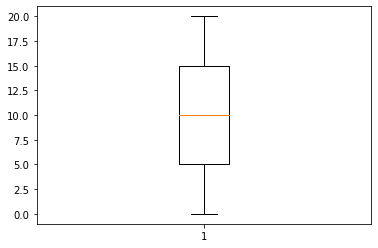

In [16]:
plt.boxplot(df['Experience'])

<AxesSubplot:xlabel='Risk_Flag', ylabel='Experience'>

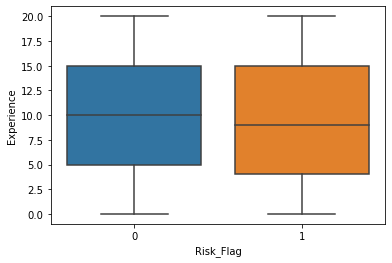

In [17]:
sns.boxplot(x='Risk_Flag', y='Experience', data=df)

## (5) `CURRENT_JOB_YRS` 시각화

{'whiskers': [<matplotlib.lines.Line2D at 0x1f5ee842308>,
 'caps': [<matplotlib.lines.Line2D at 0x1f5ee853c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f5ee850888>],
 'medians': [<matplotlib.lines.Line2D at 0x1f5ee853dc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f5ee859a48>],
 'means': []}

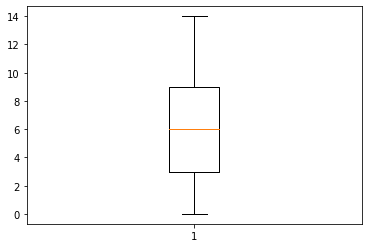

In [18]:
plt.boxplot(df['CURRENT_JOB_YRS'])

<AxesSubplot:xlabel='Risk_Flag', ylabel='CURRENT_JOB_YRS'>

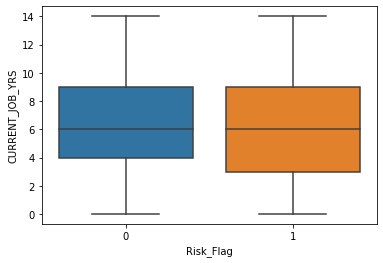

In [19]:
sns.boxplot(x='Risk_Flag', y='CURRENT_JOB_YRS', data=df)

## (6) `CURRENT_HOUSE_YRS` 시각화

{'whiskers': [<matplotlib.lines.Line2D at 0x1f5ee91ed48>,
 'caps': [<matplotlib.lines.Line2D at 0x1f5ee9389c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f5ee934cc8>],
 'medians': [<matplotlib.lines.Line2D at 0x1f5ee93dec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f5ee93de88>],
 'means': []}

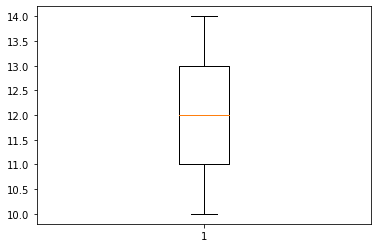

In [20]:
plt.boxplot(df['CURRENT_HOUSE_YRS'])

<AxesSubplot:xlabel='Risk_Flag', ylabel='CURRENT_HOUSE_YRS'>

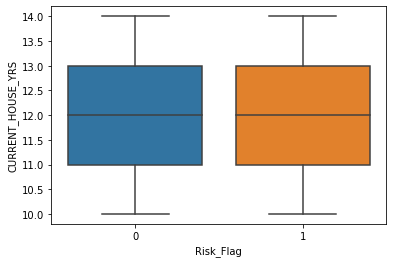

In [21]:
sns.boxplot(x='Risk_Flag', y='CURRENT_HOUSE_YRS', data=df)

### 종속 변수에 대한 분포를 쉽게 나타낼 수 있는 함수 정의

In [22]:
def multiplot(columns): 
    df_multi = pd.DataFrame({'ALL': df[columns].value_counts().sort_index().values,
                          'Default': df[df['Risk_Flag']==1][columns].value_counts().sort_index().values,
                          'No Default': df[df['Risk_Flag']==0][columns].value_counts().sort_index().values
                          }, index=df[columns].value_counts().sort_index().index)

    df_multi.plot(kind='bar')
    plt.legend(title='Risk')
    plt.show()

## (7) `Married/Single` 시각화

single     226272
married     25728
Name: Married/Single, dtype: int64

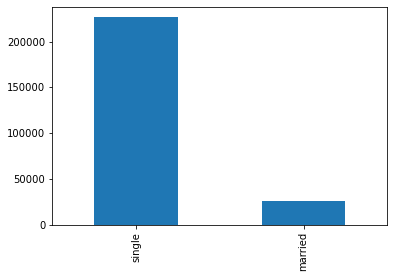

In [23]:
df['Married/Single'].value_counts().plot(kind='bar')
df['Married/Single'].value_counts()  

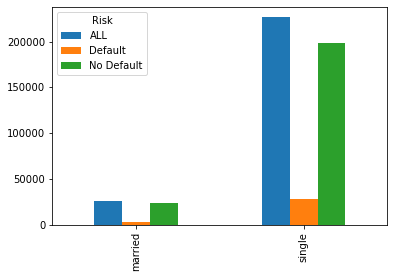

In [24]:
multiplot('Married/Single')

## (8) `House_Ownership` 시각화

rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64

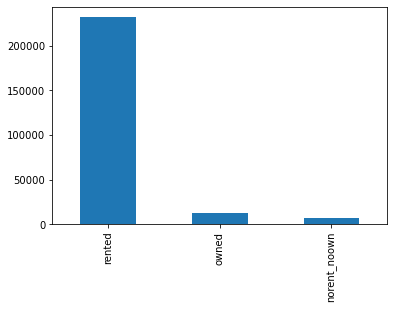

In [25]:
df['House_Ownership'].value_counts().plot(kind='bar')
df['House_Ownership'].value_counts()  

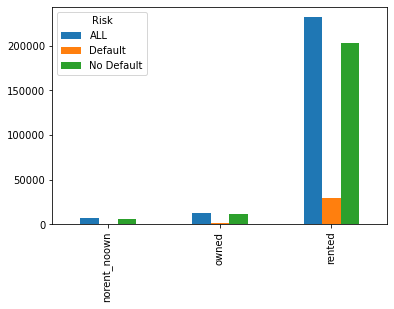

In [26]:
multiplot('House_Ownership')

## (9) `Car_Ownership` 시각화

no     176000
yes     76000
Name: Car_Ownership, dtype: int64

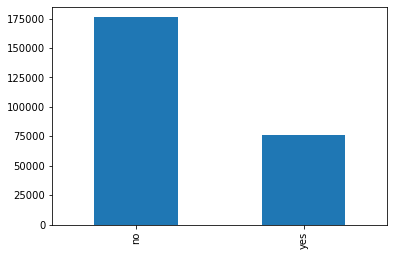

In [28]:
df['Car_Ownership'].value_counts().plot(kind='bar')
df['Car_Ownership'].value_counts()  

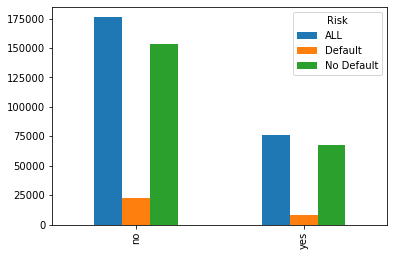

In [29]:
multiplot('Car_Ownership')

## (10) `Profession` 시각화

Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer              

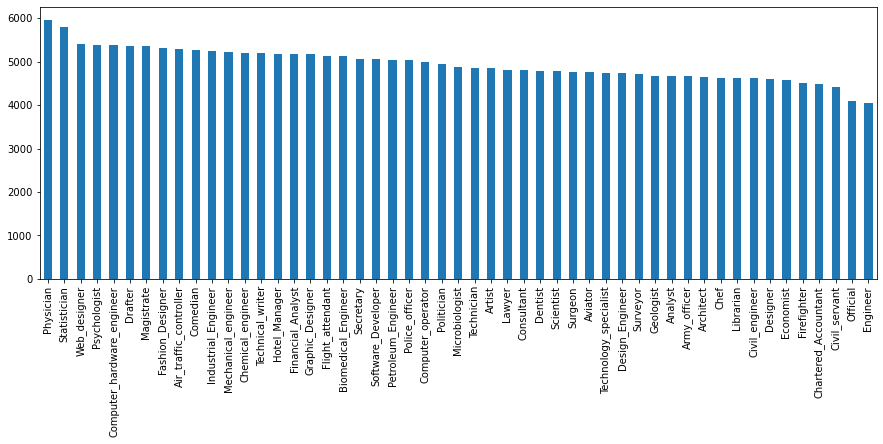

In [31]:
plt.figure(figsize=(15,5))
df['Profession'].value_counts().plot(kind='bar')
df['Profession'].value_counts()  

## (11) `CITY` 시각화

Vijayanagaram       1259
Bhopal              1208
Bulandshahr         1185
Saharsa[29]         1180
Vijayawada          1172
                    ... 
Ujjain               486
Warangal[11][12]     459
Bettiah[33]          457
Katni                448
Karaikudi            431
Name: CITY, Length: 317, dtype: int64

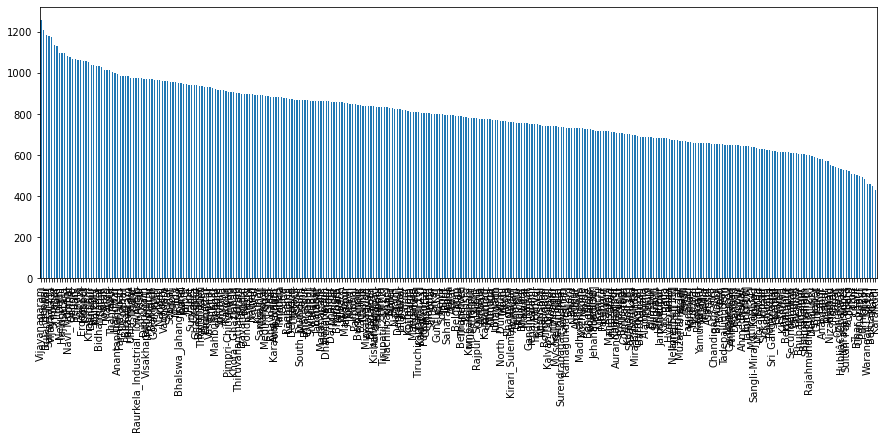

In [32]:
plt.figure(figsize=(15,5))
df['CITY'].value_counts().plot(kind='bar')
df['CITY'].value_counts()  

## (12) `STATE` 시각화

Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Mizoram                849
Manipur                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: STATE, dtype: int64

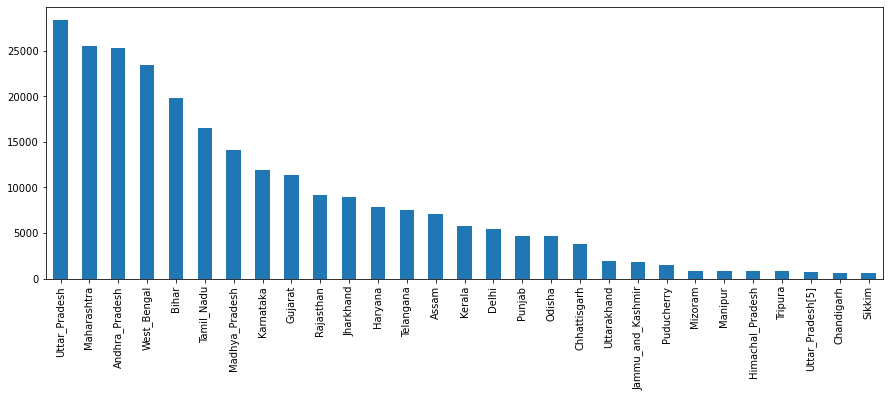

In [33]:
plt.figure(figsize=(15,5))
df['STATE'].value_counts().plot(kind='bar')
df['STATE'].value_counts()  